# ENN583 - Assessment 3 (Project 2) - Working with the Dataset

This notebook demonstrates the most basic ways of working with the provided dataset. We will demonstrate how you can:
- read the provided .json files and access the information provided within
- read and display the provided RGB images
- read the provided depth images, convert their raw measurements into meters, and display the result
- access the provided poses of the trajectory_1, and plot them 

Let's start by loading all dependencies.

In [1]:
import json 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

Both the reference (trajectory_1) and the query trajectories (trahectory_2) come with a .json file that contains important information.

Let's load the json file to a dictionary and access some of its elements.

In [2]:
# find the path to the json files for the two trajectories
basepath = Path().absolute() # Get this notebooks path
trajectory_1_path = (basepath / "trajectory_1")
trajectory_2_path = (basepath / "trajectory_2")

# load the json file for trajectory 1
with open(trajectory_1_path / "trajectory_1.json") as f:
    traj = json.load(f)

Retrieve the matrix of intrinsic parameters, K.

In [3]:
fl_x = traj["fl_x"]     # focal length in x (u) direction in pixels
fl_y = traj["fl_y"]     # focal length in y (v) direction in pixels
cx = traj["cx"]         # central point coordinate in x (u) 
cy = traj["cy"]         # central point coordinate in y (v) 
K = np.array([[fl_x, 0, cx], [0, fl_y, cy], [0, 0, 1]])
print(K)

[[1.59201318e+03 0.00000000e+00 9.54677700e+02]
 [0.00000000e+00 1.59201318e+03 7.13038390e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


Access a particular frame along the trajectory and get its transformation matrix wTc (camera to world)

In [4]:
frame = traj["frames"][0]
wTc = np.array(frame["transform_matrix"])
print(wTc)

[[ 9.97869849e-01  1.49954641e-02 -6.34881482e-02  2.35771075e-01]
 [-1.43534446e-04 -9.72714663e-01 -2.32004553e-01  2.81468965e-02]
 [-6.52348623e-02  2.31519461e-01 -9.70640600e-01  6.90241146e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Let's plot the path of the reference trajectory. We will use a colour ramp to indicate the different camera poses, and two differently coloured crosses to mark the start and end of the trajectory.

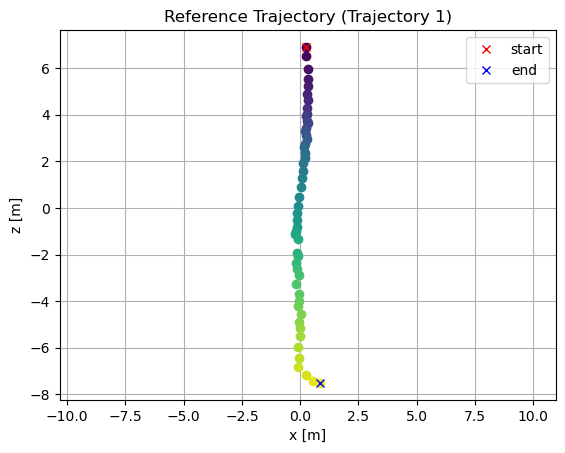

In [5]:
cm = plt.colormaps['viridis']

for i, frame in enumerate(traj["frames"]):
    wTc = np.array(frame["transform_matrix"])
    # plot the points and use a color ramp to indicate time
    color = cm( i / len(traj["frames"]))
    plt.plot(wTc[0, 3], wTc[2, 3], "o", color=color)
   
# indicate start and end of the trajectory with a special marker
wTc = np.array(traj["frames"][0]["transform_matrix"])
plt.plot(wTc[0, 3], wTc[2, 3], "x", color="red", label="start")
wTc = np.array(traj["frames"][-1]["transform_matrix"])
plt.plot(wTc[0, 3], wTc[2, 3], "x", color="blue", label="end")


plt.axis('equal'); plt.grid('on'); plt.legend()
plt.xlabel('x [m]'); plt.ylabel('z [m]')
plt.title('Reference Trajectory (Trajectory 1)')
plt.show()


Both trajectories comprise RGB and Depth images. The next code cell demonstrates how to load and display both.

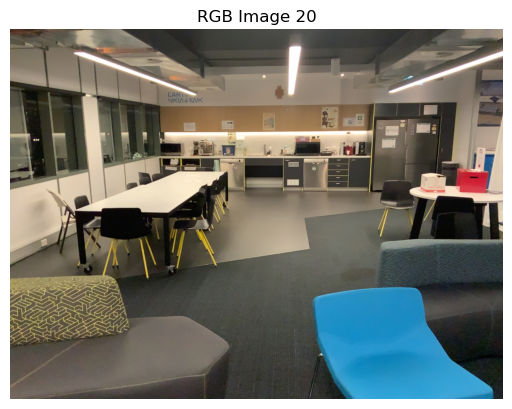

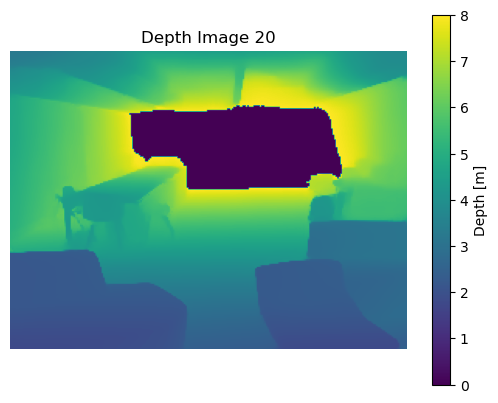

In [6]:
# we will show the depth and RGB images for the 20th frame
idx = 20

# get access to the frame data (remember this comes from the .json file we opened above)
frame_0 = traj["frames"][idx]
image_path = trajectory_1_path / frame_0["file_path"]

# load the RGB image with opencv
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(image)
plt.axis('off')
plt.title(f'RGB Image {idx}')
plt.show()


# ====================================================
# now load and display the corresponding Depth image
depth_image_path = trajectory_1_path / frame_0["depth_path"] # Get the path to the depth image
depth_image = cv2.imread(str(depth_image_path), cv2.IMREAD_UNCHANGED)   # notice the flag to read the image as is, without converting it to a unit8 type

# we want to convert the depth image measurements to meters
integer_depth_scale = traj["integer_depth_scale"] # Get the scale needed to convert to meters
depth_image = depth_image * integer_depth_scale # Now depth is in meters

plt.figure()
plt.imshow(depth_image, cmap='viridis')
cbar = plt.colorbar(); plt.axis('off'); plt.title(f'Depth Image {idx}')
cbar.set_label('Depth [m]')
# plt.axis('equal')
plt.show()


